In [46]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Select WGS 84 for map format when checking out data from Analysisportal
xl = pd.ExcelFile('fladdermusWGS84.xlsx')
xl.sheet_names
df = xl.parse("SLW Data")
pd.to_datetime(df.Startdatum, format='%Y-%m-%d')
df.head()

,Vetenskapligt namn,Svenskt namn,Organismgrupp,Fyndstatus,Observatör,Lokal,Län,Koordinatnoggrannhet (m),X,Y,Startdatum,Slutdatum,Datakälla,Osäker bestämning,Valideringstatus,ObservationId
0,Eptesicus nilssonii,nordfladdermus,Däggdjur,Present,Marcus Schwarz,Brantåsa,Kronoberg,25,"15,444599933","57,196747847",2013-06-25,2013-06-25,Artportalen,False,Unvalidated,595463
1,Myotis mystacinus/brandtii,mustaschfladdermus/tajgafladdermus,Däggdjur,Present,Marcus Schwarz,Källeflaga,Kronoberg,1000,"15,43359557","57,205428976",2013-06-24,2013-06-24,Artportalen,False,Unvalidated,595462
2,Eptesicus nilssonii,nordfladdermus,Däggdjur,Present,Marcus Schwarz,Källeflaga,Kronoberg,1000,"15,43359557","57,205428976",2013-06-24,2013-06-24,Artportalen,False,Unvalidated,595461
3,Myotis nattereri,fransfladdermus,Däggdjur,Present,Marcus Schwarz,Källeflaga,Kronoberg,1000,"15,43359557","57,205428976",2013-06-24,2013-06-24,Artportalen,False,Unvalidated,596186
4,Plecotus auritus,brunlångöra,Däggdjur,Present,Dennis Nyström,"Nordvästra fågeltornet, Paviken",Gotland,75,"18,132242482","57,460199476",2013-05-20,2013-05-20,Artportalen,False,Unvalidated,596347


In [7]:
ts = df.set_index(pd.DatetimeIndex(df['Startdatum'])) # Create a dataframe with datetime as index
ts.index # make sure the dtype='datetime64[ns]'

DatetimeIndex(['2013-06-25', '2013-06-24', '2013-06-24', '2013-06-24',
               '2013-05-20', '2007-04-27', '2007-04-27', '2007-05-01',
               '2007-05-08', '2005-06-17',
               ...
               '2008-05-08', '2008-07-08', '2008-07-08', '2008-07-08',
               '2008-07-08', '2010-08-06', '2010-09-11', '2010-09-08',
               '2010-08-28', '2010-07-11'],
              dtype='datetime64[ns]', length=14794, freq=None)

In [8]:
print(ts['Startdatum'].min())
print(ts['Startdatum'].max())
#ts['ObservationId'].plot()

1843-01-01
2016-11-26


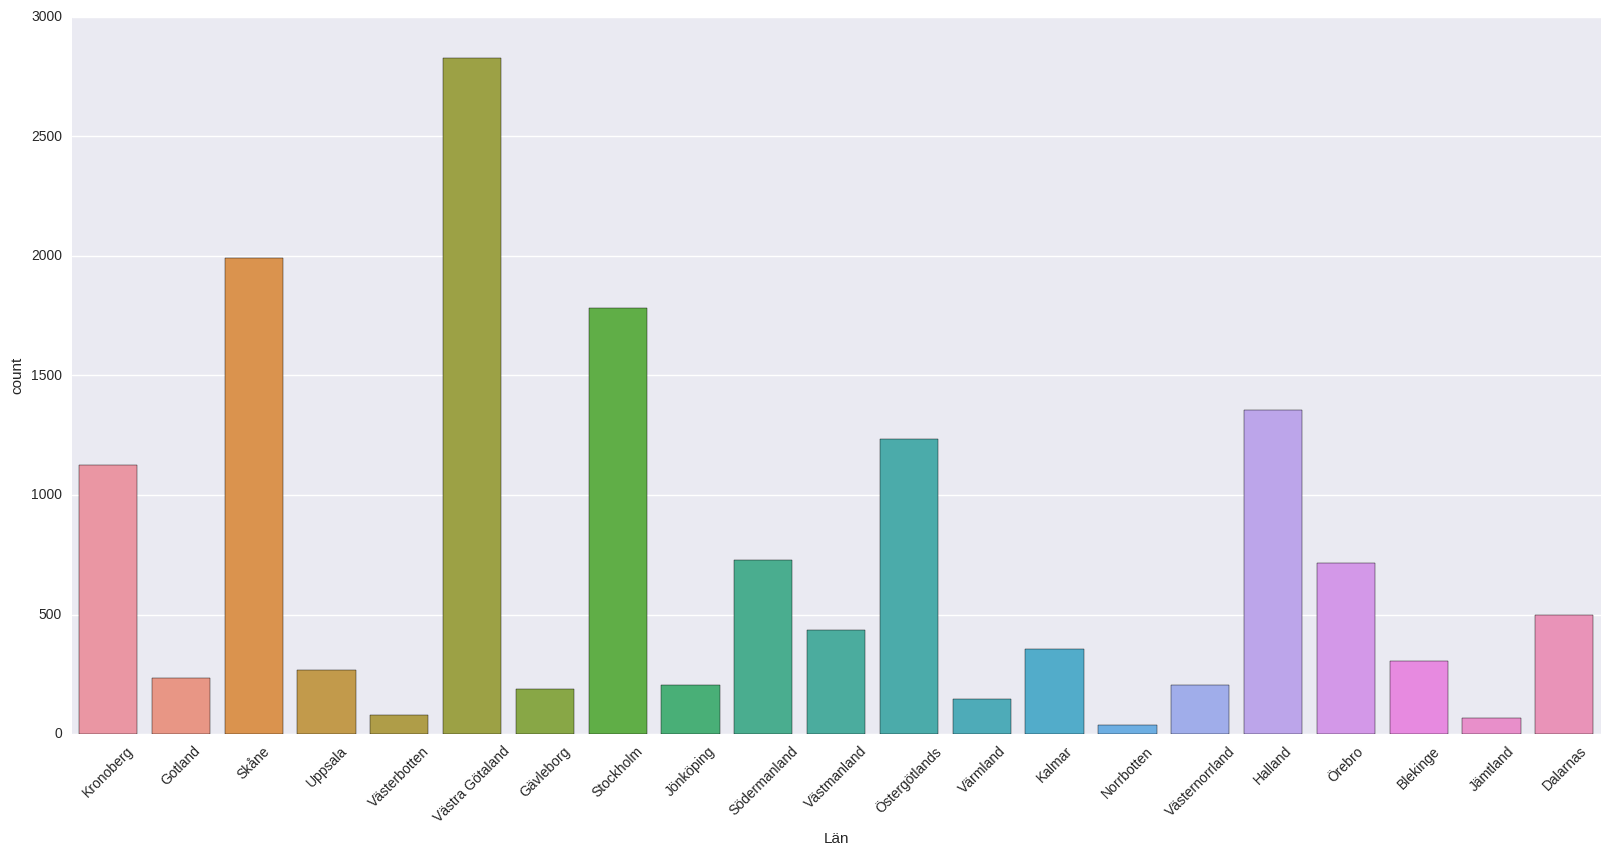

In [9]:
lan = sns.factorplot('Län', data=df, kind='count', size=8, aspect=2)
lan.set_xticklabels(rotation=45)

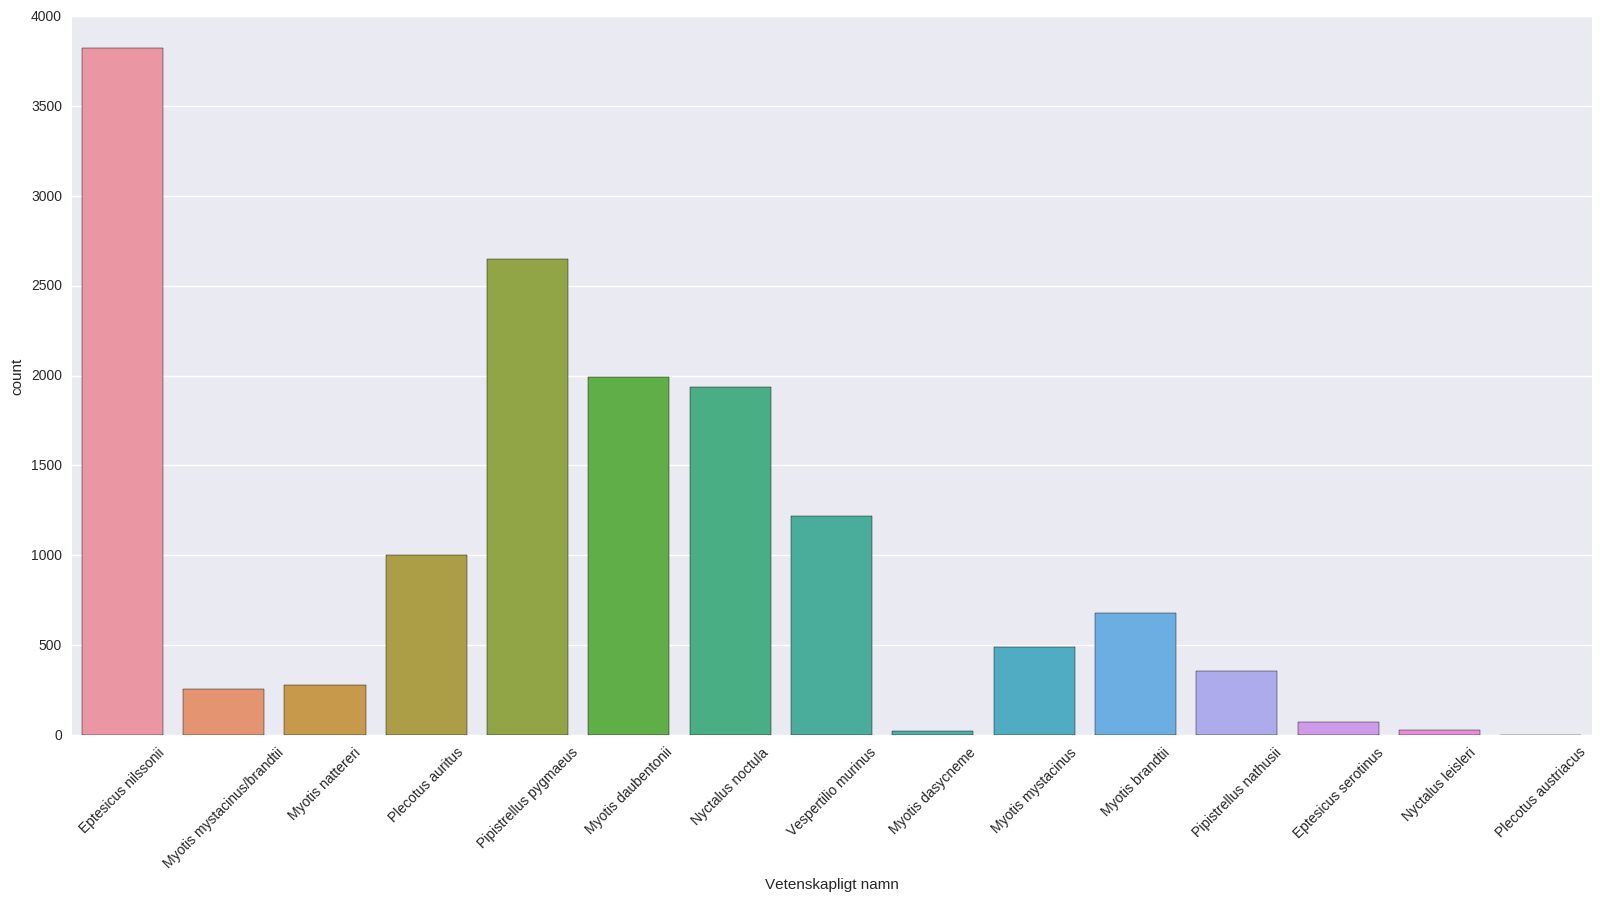

In [35]:
lan = sns.factorplot('Vetenskapligt namn', data=df, kind='count', size=8, aspect=2)
lan.set_xticklabels(rotation=45)

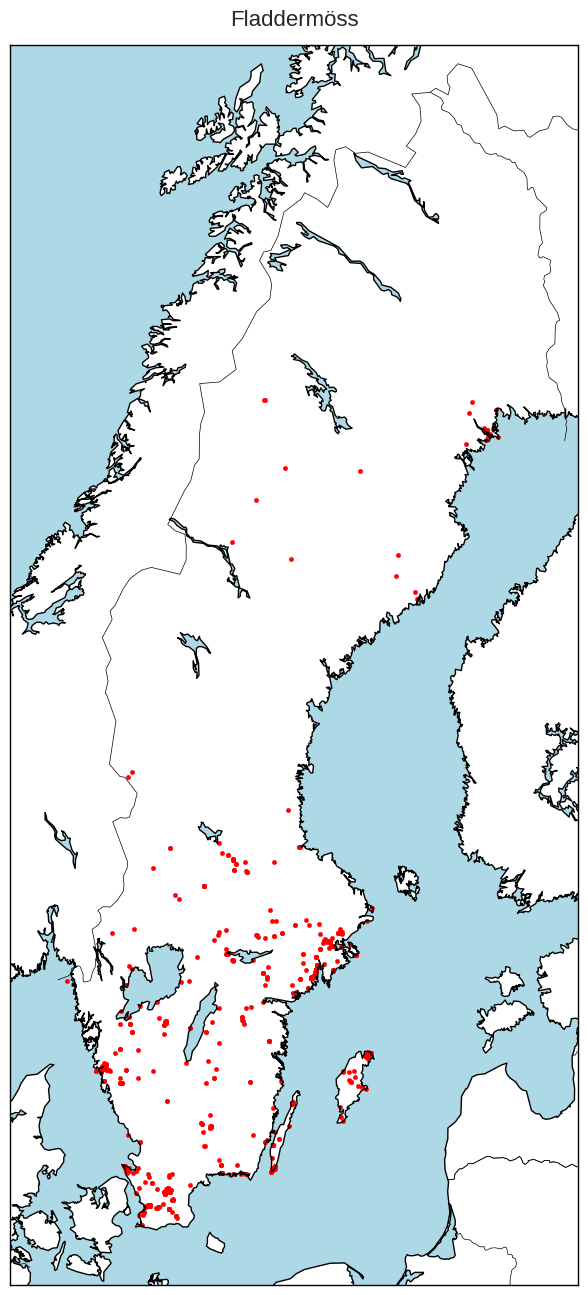

In [56]:
# Map projection inspired by http://maxberggren.se/2016/07/14/atomic-parts-of-town-names/
ratio = 1

map = Basemap(
    projection='merc',
    resolution='i', 
    area_thresh=250,
    llcrnrlon=9.5, 
    llcrnrlat=54.5,
    urcrnrlon=24.5, 
    urcrnrlat=69.5
)

fig = plt.figure(figsize=(20*ratio, 16*ratio), dpi=200)

map.drawcoastlines(linewidth=0, color="#000000") 
map.drawcountries()
map.drawstates()
map.drawmapboundary()
map.fillcontinents(color='white', lake_color='lightblue', zorder=0)
map.drawmapboundary(fill_color='lightblue')
title = plt.title(u'Fladdermöss', fontsize=16*ratio) 
title.set_y(1.01) 

map.drawcoastlines()

def longlat():
    '''
    Returns two lists of longitudes and 
    latitudes that can be plotted as x and y 
    axes.
    longlat()[0] = list of latitudes
    longlat()[1] = list of longitudes
    '''
    longs = []
    lats = []
    for index, row in df.iterrows():
        #if row['Vetenskapligt namn'] == 'Eptesicus serotinus':     
        datetime_object = datetime.strptime(row['Startdatum'], '%Y-%m-%d')
        if datetime_object > datetime.strptime('2016-01-01', '%Y-%m-%d'):
            #print(datetime_object)
            # Transform X,Y to latlong by switching place and replacing comma with dot
            longitude = row['Y'].replace(',', '.')
            longs.append(float(longitude))      
            latitude = row['X'].replace(',', '.')
            lats.append(float(latitude))
    return longs, lats


x, y = map(longlat()[1], longlat()[0])
map.scatter(x, y, marker='o', s=10*ratio, color="red")

#print(longlat()[1])
#plt.show()